This notebook will help come up with graphs for the EDA of the Compact Results csv table.



In [ ]:
import pandas as pd
import numpy as np
import json
import csv
import matplotlib.pyplot as plt
from google.colab import drive
import sklearn
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_file = '/content/drive/Shareddrives/STAT 482 Project/Data/MRegularSeasonDetailedResults.csv'
data = pd.read_csv(csv_file)
print(data)

        Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  \
0         2003      10     1104      68     1328      62    N      0    27   
1         2003      10     1272      70     1393      63    N      0    26   
2         2003      11     1266      73     1437      61    N      0    24   
3         2003      11     1296      56     1457      50    N      0    18   
4         2003      11     1400      77     1208      71    N      0    30   
...        ...     ...      ...     ...      ...     ...  ...    ...   ...   
113120    2024     128     1437      58     1177      57    N      0    22   
113121    2024     128     1448      72     1323      59    N      0    27   
113122    2024     128     1455      88     1349      81    N      0    35   
113123    2024     128     1462      76     1139      72    N      0    31   
113124    2024     128     1465      74     1430      63    A      1    25   

        WFGA  ...  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl

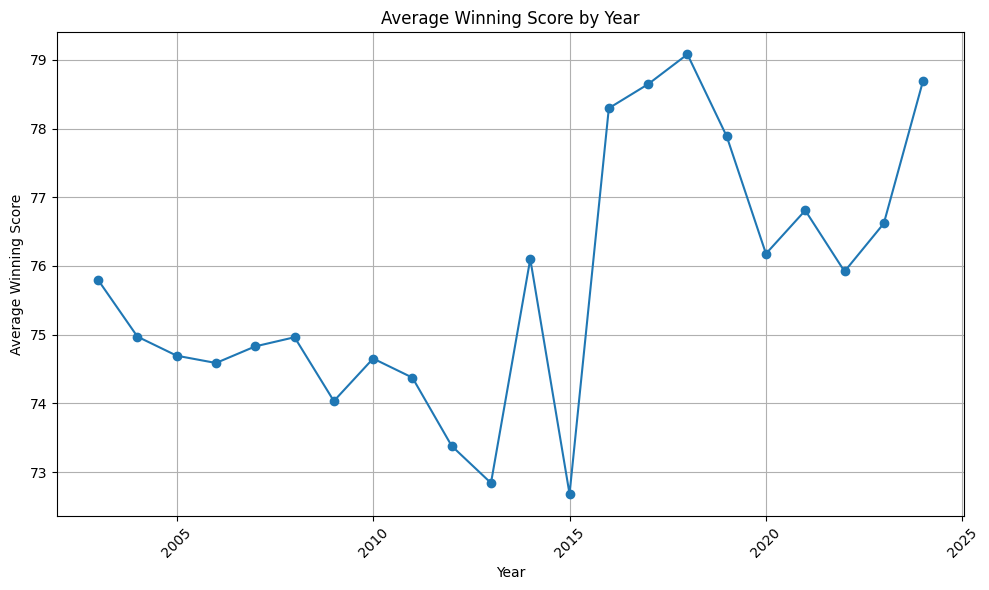

In [ ]:
average_winning_score_by_year = data.groupby('Season')['WScore'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_winning_score_by_year.index, average_winning_score_by_year.values, marker='o', linestyle='-')
plt.title('Average Winning Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Winning Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

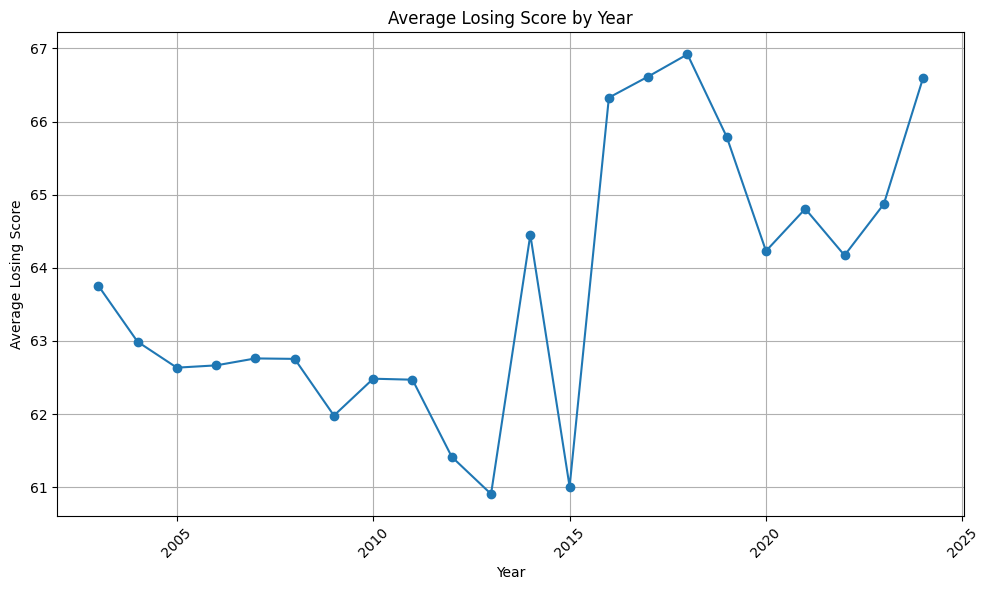

In [ ]:
average_losing_score_by_year = data.groupby('Season')['LScore'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_losing_score_by_year.index, average_losing_score_by_year.values, marker='o', linestyle='-')
plt.title('Average Losing Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Losing Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data_2024 = data[data['Season'] == 2024]

print(data_2024)
grouped_by_team = data_2024.groupby('WTeamID')


win_score_per_team = grouped_by_team['WScore'].mean()

plt.figure(figsize=(100, 100))
win_score_per_team.plot(kind='bar')
plt.title('Average Winning Score per Team in 2024')
plt.xlabel('Team ID')
plt.ylabel('Average Winning Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

        Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  WFGM  \
107634    2024       0     1101      64     1329      59    A      0    26   
107635    2024       0     1103      81     1355      75    A      0    26   
107636    2024       0     1104     105     1287      73    H      0    32   
107637    2024       0     1112     122     1288      59    H      0    42   
107638    2024       0     1114      71     1402      66    H      0    22   
...        ...     ...      ...     ...      ...     ...  ...    ...   ...   
113120    2024     128     1437      58     1177      57    N      0    22   
113121    2024     128     1448      72     1323      59    N      0    27   
113122    2024     128     1455      88     1349      81    N      0    35   
113123    2024     128     1462      76     1139      72    N      0    31   
113124    2024     128     1465      74     1430      63    A      1    25   

        WFGA  ...  LFGA3  LFTM  LFTA  LOR  LDR  LAst  LTO  LStl

Making a basic model for predicting the winner of a game with basic summary stats.

Changing the TeamID variables to identify the seasons within the variable

In [ ]:
data['WTeamID'] = data['WTeamID'].astype(str) + data['Season'].astype(str).str[-2:]
print(data['WTeamID'])

0         110403
1         127203
2         126603
3         129603
4         140003
           ...  
113120    143724
113121    144824
113122    145524
113123    146224
113124    146524
Name: WTeamID, Length: 113125, dtype: object


In [ ]:
data['LTeamID'] = data['LTeamID'].astype(str) + data['Season'].astype(str).str[-2:]
print(data['LTeamID'])

0         132803
1         139303
2         143703
3         145703
4         120803
           ...  
113120    117724
113121    132324
113122    134924
113123    113924
113124    143024
Name: LTeamID, Length: 113125, dtype: object


In [ ]:
ml_data = data.drop(columns=['DayNum', 'WScore', "LScore", 'NumOT', 'WFGM', 'WFGA', 'WFTA', 'WFTM', 'WFGA3', 'WFGM3', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFTA', 'LFTM', 'LFGA3', 'LFGM3', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'])
ml_data['Outcome'] = 1
mask = ml_data['WLoc'] =='A'
mask1 = ml_data['WLoc'] == 'N'
ml_data.loc[mask, 'Outcome'] = 0
ml_data = ml_data[~mask1]
ml_data = ml_data.drop(columns=['WLoc'])
print(ml_data)

        Season WTeamID LTeamID  Outcome
5         2003  145803  118603        1
6         2003  116103  123603        1
9         2003  145803  129603        1
10        2003  116603  142603        1
13        2003  132303  112503        1
...        ...     ...     ...      ...
113081    2024  144724  146724        0
113087    2024  115924  125024        1
113098    2024  127024  131124        1
113109    2024  137224  110124        1
113124    2024  146524  143024        0

[101573 rows x 4 columns]


In [ ]:
data['WFGP'] = (data['WFGM'] / data['WFGA']) * 100
data['LFGP'] = (data['LFGM'] / data['LFGA']) * 100
data['WFGP3'] = (data['WFGM3'] / data['WFGA3']) * 100
data['LFGP3'] = (data['LFGM3'] / data['LFGA3']) * 100
data['WFTP'] = (data['WFTM'] / data['WFTA']) * 100
data['LFTP'] = (data['LFTM'] / data['LFTA']) * 100
data['WORP'] = (data['WOR'] / (data['WOR'] + data['LDR'])) * 100
data['LORP'] = (data['LOR'] / (data['LOR'] + data['WDR'])) * 100
data['WDRP'] = (data['WDR'] / (data['WDR'] + data['LOR'])) * 100
data['LDRP'] = (data['LDR'] / (data['LDR'] + data['WOR'])) * 100
data['WDRP'] = (data['WDR'] / (data['WDR'] + data['LOR'])) * 100
data['LDRP'] = (data['LDR'] / (data['LDR'] + data['WOR'])) * 100
data['WTR'] = data['WOR'] + data['WDR']
data['LTR'] = data['LOR'] + data['LDR']
data['WTRP'] = (data['WTR'] / (data['WTR'] + data['LTR'])) * 100
data['LTRP'] = (data['LTR'] / (data['LTR'] + data['WTR'])) * 100
data['WPoss'] = .96 * (data['WFGA'] + .475 * data['WFTA'] - data['WOR'] + data['WTO'])
data['WOffRat'] = 100 * (data['WScore'] / data['WPoss'])
data['LPoss'] = .96 * (data['LFGA'] + .475 * data['LFTA'] - data['LOR'] + data['LTO'])
data['LOffRat'] = 100 * (data['LScore'] / data['LPoss'])
data['WDefRat'] = 100 * (data['LScore'] / data['LPoss'])
data['LDefRat'] = 100 * (data['WScore'] / data['WPoss'])
data['WEFG'] = (data['WFGM'] + .5 * data['WFGM3']) / data['WFGA']
data['WTS'] = data['WScore'] / (2 * (data['WFGA'] + (.475 * data['WFTA'])))
data['LEFG'] = (data['LFGM'] + .5 * data['LFGM3']) / data['LFGA']
data['LTS'] = data['LScore'] / (2 * (data['LFGA'] + (.475 * data['LFTA'])))


Finding the average margin of victory and defeat per season per team

In [ ]:
data['MarginOfVictory'] = data["WScore"] - data["LScore"]


data['MarginOfDefeat'] = data['LScore'] - data['WScore']

In [ ]:
winning_grouped = data.groupby(['WTeamID'])


winning_statistics = winning_grouped.agg({
    # Aggregate statistics for winning teams
    'WTS': 'mean',
    'WOffRat': 'mean',
    'WDefRat': 'mean',
    'WEFG': 'mean',
    'WORP': 'mean',
    'WDRP': 'mean',
    'WTRP': 'mean',
    'MarginOfVictory': 'mean',
}).reset_index()

print(winning_statistics)

     WTeamID       WTS     WOffRat     WDefRat      WEFG       WORP  \
0     110114  0.633909  118.873204  115.724770  0.594661  28.812317   
1     110115  0.633377  121.747789  102.378658  0.601518  28.140246   
2     110116  0.587991  114.483548  101.285595  0.540927  26.687673   
3     110117  0.601762  111.155695  103.784274  0.563668  26.199054   
4     110118  0.572679  113.219700  101.889450  0.547842  25.999780   
...      ...       ...         ...         ...       ...        ...   
7604  147623  0.585283  109.753560   95.346142  0.540743  18.732418   
7605  147624  0.586343  112.459273   90.904207  0.569161  18.890152   
7606  147723  0.556076  110.047492  101.016186  0.529765  26.109521   
7607  147724  0.557055  113.018962  102.700016  0.524659  21.771760   
7608  147824  0.611795  119.663350   95.009022  0.578558  18.920455   

           WDRP       WTRP  MarginOfVictory  
0     67.352941  50.000000         3.500000  
1     66.405674  48.357612        12.142857  
2     73.

In [ ]:
losing_grouped = data.groupby(['LTeamID'])


losing_statistics = losing_grouped.agg({
    # Aggregate statistics for winning teams
    'LTS': 'mean',
    'LOffRat': 'mean',
    'LDefRat': 'mean',
    'LEFG': 'mean',
    'LORP': 'mean',
    'LDRP': 'mean',
    'LTRP': 'mean',
    'MarginOfDefeat': 'mean'
}).reset_index()

print(losing_statistics)

     LTeamID       LTS     LOffRat     LDefRat      LEFG       LORP  \
0     110114  0.514906   95.119369  122.128004  0.465271  24.243277   
1     110115  0.465642   89.507166  119.576548  0.434981  22.683298   
2     110116  0.521665   99.503371  119.055883  0.489505  23.053161   
3     110117  0.514638   97.289307  112.781606  0.502489  21.375468   
4     110118  0.516335   97.268006  111.294740  0.480980  26.426409   
...      ...       ...         ...         ...       ...        ...   
7609  147623  0.514373   93.505009  111.825003  0.480658  14.866396   
7610  147624  0.486680   92.254372  116.488496  0.461511  20.136606   
7611  147723  0.549105  103.932190  117.258112  0.525790  23.776840   
7612  147724  0.459423   89.745838  117.551304  0.426468  21.046949   
7613  147824  0.481404   95.434552  116.215985  0.449079  23.341589   

           LDRP       LTRP  MarginOfDefeat  
0     66.851407  44.675686      -17.473684  
1     66.100637  41.951385      -18.523810  
2     71.837

In [ ]:
team_statistics = pd.merge(winning_statistics, losing_statistics, left_on='WTeamID', right_on='LTeamID', how='outer')
team_statistics.fillna(0, inplace=True)  # Fill NaN values with 0 for teams that only appear as losers or winners
print(team_statistics)


     WTeamID       WTS     WOffRat     WDefRat      WEFG       WORP  \
0     110114  0.633909  118.873204  115.724770  0.594661  28.812317   
1     110115  0.633377  121.747789  102.378658  0.601518  28.140246   
2     110116  0.587991  114.483548  101.285595  0.540927  26.687673   
3     110117  0.601762  111.155695  103.784274  0.563668  26.199054   
4     110118  0.572679  113.219700  101.889450  0.547842  25.999780   
...      ...       ...         ...         ...       ...        ...   
7612       0  0.000000    0.000000    0.000000  0.000000   0.000000   
7613       0  0.000000    0.000000    0.000000  0.000000   0.000000   
7614       0  0.000000    0.000000    0.000000  0.000000   0.000000   
7615       0  0.000000    0.000000    0.000000  0.000000   0.000000   
7616       0  0.000000    0.000000    0.000000  0.000000   0.000000   

           WDRP       WTRP  MarginOfVictory LTeamID       LTS    LOffRat  \
0     67.352941  50.000000         3.500000  110114  0.514906  95.11936

In [ ]:
team_statistics['TSP'] = (team_statistics['WTS'] + team_statistics['LTS']) / 2  # Average TS% for each team
team_statistics['OffRat'] = (team_statistics['LOffRat'] + team_statistics['WOffRat']) / 2  # Average Offensive Rating
team_statistics['EFGP'] = (team_statistics['WEFG'] + team_statistics['LEFG']) / 2  # Average EFG% for each team
team_statistics['DefRat'] = (team_statistics['WDefRat'] + team_statistics['LDefRat']) / 2  # Average Defensive Rating
team_statistics['ORP'] = (team_statistics['WORP'] + team_statistics['LORP']) / 2
team_statistics['DRP'] = (team_statistics['WDRP'] + team_statistics['LDRP']) / 2
team_statistics['TRP'] = (team_statistics['WTRP'] + team_statistics['LTRP']) / 2
team_statistics['TeamID'] = team_statistics['WTeamID']
# if a team lost all its games, make sure that the total combined statistics are simply from losing games
losers = team_statistics['WTeamID'] == 0
team_statistics['TSP'] = np.where(losers, team_statistics['LTS'], team_statistics['TSP'])
team_statistics['OffRat'] = np.where(losers, team_statistics['LOffRat'], team_statistics['OffRat'])
team_statistics['EFGP'] = np.where(losers, team_statistics['LEFG'], team_statistics['EFGP'])
team_statistics['DefRat'] = np.where(losers, team_statistics['LDefRat'], team_statistics['DefRat'])
team_statistics['ORP'] = np.where(losers, team_statistics['LORP'], team_statistics['ORP'])
team_statistics['DRP'] = np.where(losers, team_statistics['LDRP'], team_statistics['DRP'])
team_statistics['TRP'] = np.where(losers, team_statistics['LTRP'], team_statistics['TRP'])
team_statistics['TeamID'] = team_statistics['LTeamID']

winners = team_statistics['LTeamID'] == 0
team_statistics['TSP'] = np.where(winners, team_statistics['WTS'], team_statistics['TSP'])
team_statistics['OffRat'] = np.where(winners, team_statistics['WOffRat'], team_statistics['OffRat'])
team_statistics['EFGP'] = np.where(winners, team_statistics['WEFG'], team_statistics['EFGP'])
team_statistics['DefRat'] = np.where(winners, team_statistics['WDefRat'], team_statistics['DefRat'])
team_statistics['ORP'] = np.where(winners, team_statistics['WORP'], team_statistics['ORP'])
team_statistics['DRP'] = np.where(winners, team_statistics['WDRP'], team_statistics['DRP'])
team_statistics['TRP'] = np.where(winners, team_statistics['WTRP'], team_statistics['TRP'])

team_statistics.drop(['WTeamID', 'LTeamID', 'WTS', 'LTS', 'WOffRat', "LOffRat", "WEFG", 'LEFG', 'WDefRat', "LDefRat", 'WORP', 'LORP', "WDRP", "LDRP", 'WTRP', 'LTRP'], axis=1, inplace=True)



In [ ]:
print(team_statistics)


      MarginOfVictory  MarginOfDefeat       TSP      OffRat      EFGP  \
0            3.500000      -17.473684  0.574407  106.996286  0.529966   
1           12.142857      -18.523810  0.549509  105.627478  0.518250   
2            7.555556      -13.388889  0.554828  106.993459  0.515216   
3            4.666667      -10.062500  0.558200  104.222501  0.533078   
4            7.333333       -9.733333  0.544507  105.243853  0.514411   
...               ...             ...       ...         ...       ...   
7612         0.000000      -22.666667  0.440290   81.281371  0.395527   
7613         0.000000      -13.259259  0.476057   92.272166  0.445513   
7614         0.000000      -21.068966  0.440630   81.050676  0.401613   
7615         0.000000      -18.142857  0.448937   85.619090  0.414186   
7616         0.000000      -23.250000  0.420887   82.069936  0.389548   

          DefRat        ORP        DRP        TRP  TeamID  
0     118.926387  26.527797  67.102174  47.337843  110114  
1  

In [ ]:
merged_data_winning = pd.merge(ml_data, team_statistics, left_on=['WTeamID'], right_on=['TeamID'], how='inner')
merged_data_winning = merged_data_winning.rename(columns={'MarginOfVictory': 'WMarginOfVictory', 'MarginOfDefeat': 'WMarginOfDefeat', 'TSP':"WTSP",'OffRat':'WOffRat','EFGP':'WEFGP', 'DefRat':'WDefRat', 'ORP':"WORP",'DRP':'WDRP','TRP':'WTRP'})
merged_data_winning = merged_data_winning.drop(columns=['TeamID'])

print(merged_data_winning)

        Season WTeamID LTeamID  Outcome  WMarginOfVictory  WMarginOfDefeat  \
0         2003  145803  118603        1         18.272727        -7.571429   
1         2003  145803  129603        1         18.272727        -7.571429   
2         2003  145803  145403        1         18.272727        -7.571429   
3         2003  145803  145303        0         18.272727        -7.571429   
4         2003  145803  142403        1         18.272727        -7.571429   
...        ...     ...     ...      ...               ...              ...   
101492    2024  117824  123724        1         15.000000       -15.225806   
101493    2024  121424  140624        1          4.666667       -14.333333   
101494    2024  121424  114424        0          4.666667       -14.333333   
101495    2024  121424  128424        1          4.666667       -14.333333   
101496    2024  129024  134124        1          6.000000       -23.200000   

            WTSP     WOffRat     WEFGP     WDefRat       WORP  

In [ ]:
merged_data_losing = pd.merge(ml_data, team_statistics, left_on=['LTeamID'], right_on=['TeamID'], how='left')
merged_data_losing = merged_data_losing.rename(columns={'MarginOfVictory': 'LMarginOfVictory', 'MarginOfDefeat': 'LMarginOfDefeat', 'TSP':"LTSP",'OffRat':'LOffRat','EFGP':'LEFGP', 'DefRat':'LDefRat', 'ORP':"LORP",'DRP':'LDRP','TRP':'LTRP'})
merged_data_losing = merged_data_losing.drop(columns=['TeamID'])

In [ ]:
merged_data = pd.merge(merged_data_winning, merged_data_losing, on=['Season','WTeamID', 'LTeamID', 'Outcome'], how='inner')
print(merged_data)
print(merged_data.columns)

        Season WTeamID LTeamID  Outcome  WMarginOfVictory  WMarginOfDefeat  \
0         2003  145803  118603        1         18.272727        -7.571429   
1         2003  145803  129603        1         18.272727        -7.571429   
2         2003  145803  145403        1         18.272727        -7.571429   
3         2003  145803  145303        0         18.272727        -7.571429   
4         2003  145803  142403        1         18.272727        -7.571429   
...        ...     ...     ...      ...               ...              ...   
103712    2024  117824  123724        1         15.000000       -15.225806   
103713    2024  121424  140624        1          4.666667       -14.333333   
103714    2024  121424  114424        0          4.666667       -14.333333   
103715    2024  121424  128424        1          4.666667       -14.333333   
103716    2024  129024  134124        1          6.000000       -23.200000   

            WTSP     WOffRat     WEFGP     WDefRat  ...       W

Now our ML model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



# Prepare Data
X = merged_data[['WMarginOfVictory',
       'WMarginOfDefeat', 'WTSP', 'WOffRat', 'WEFGP', 'WDefRat', 'WORP',
       'WDRP', 'WTRP', 'LMarginOfVictory', 'LMarginOfDefeat', 'LTSP',
       'LOffRat', 'LEFGP', 'LDefRat', 'LORP', 'LDRP', 'LTRP']]



y = merged_data[['Outcome']]
y = np.ravel(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Selection
model = LogisticRegression(max_iter = 1000)

# Model Training
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)


print("Accuracy:", accuracy)


Accuracy: 0.6545025067489395


In [ ]:
coefficients = model.coef_

coefficients = coefficients[0].tolist()

feature_names = X_train.columns.tolist()

feature_coefficients = zip(feature_names, coefficients)

for item in feature_coefficients:
  print(item)



('WMarginOfVictory', 0.07322615724163842)
('WMarginOfDefeat', 0.016793448095480484)
('WTSP', -0.0017808455830509418)
('WOffRat', -0.05452183867586162)
('WEFGP', -0.0030487417321733395)
('WDefRat', 0.049085510246056306)
('WORP', -0.02116731821093196)
('WDRP', -0.028980312768199942)
('WTRP', 0.05442844670210173)
('LMarginOfVictory', -0.008941209603735522)
('LMarginOfDefeat', -0.01795163237193346)
('LTSP', 0.0027647119972641077)
('LOffRat', 0.026307295744565497)
('LEFGP', 0.002785729807981093)
('LDefRat', -0.01986531885635256)
('LORP', 0.02792049050993388)
('LDRP', 0.022450439554384673)
('LTRP', -0.052960295942757696)


Taking a different approach


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create RandomForestClassifier instance
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object with RandomForestClassifier and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search with cross-validation on the training data
grid_search.fit(X_train_val, y_train_val)

# Print the best hyperparameters found by grid search
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create RandomForestClassifier instance
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object with RandomForestClassifier and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search with cross-validation on the training data
grid_search.fit(X_train_val, y_train_val)

# Print the best hyperparameters found by grid search
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

NameError: name 'X_train_val' is not defined